<font size=6><b>Lec13. ARIMA

* ref: ARIMA ebook : https://otexts.com/fppkr/arima.html
* ref: 시계열 허와 실 : https://m.blog.naver.com/bluefish850/220725222798
* ref :SAS :  https://m.blog.naver.com/hsj2864/220892642198

# 1. 시계열 분석이란

### 1) 정의 
* 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법 
* 과거의 패턴이 미래에도 지속된다는 데이터의 안정성이 기본적인 가정으로 필요

### 2) 시계열 패턴

* <font color=red> $T$ </font> 추세(trend) : 데이터가 장기적으로 증가하거나 감소하는 패턴
* <font color=red> $S$ </font>계절성(seasonality) : 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴
* <font color=red> $C$ </font>주기성(cycle) : 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로,일정 주기가 없으며 장기적인 변화 현상
* <font color=red> $R$ </font> 불규칙요소(Random, Residual) : 추세, 순환, 계절성은 뺀 나머지, 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임이의 변동


### 3) 시계열 패턴 분해
* <b>덧셈 분해(additive decomposition)</b>&nbsp; Trend와 Seasonal이 별개, $ y_t = S_t+T_t+R_t $
* <b>곱셈 분해(multiplicative decomposition)</b>&nbsp; Trend에 따라 Seasonal이 변화,  $ y_t = S_t*T_t*R_t $ , 데이터에 0이 존재해서는 안된다.

<font color='blue'>
Additive : 시간에 지남에 따라(Trend가 변화함에 따라) 변동폭이 일정&nbsp; &nbsp; &nbsp; &nbsp;
Multiplicative : Trend가 상승함에 따라 변동폭 증가 </font>
<img src=./img/img33.png>


### 4) 정상성
* 시간에 따른 평균&분산이 일정한 패턴


### <font color=red> 5) 비정상성 데이터를 정상성(평균,분산 일정)으로 만드는 방법
*  <font color=red>변동폭이 일정하지 않은 경우 : 로그 변환</font>
*  <font color=red>추세, 계절성이 존재하는 경우 : 차분(y_t - y_{t-1}) </font>

<pre>
* (a)와 같이 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 비정상 시계열 데이터
* (b)로그변환 --> 변동폭 일정
* (c)차분 --> 평균 일정
* (d)로그변환+차분 --> 평균과 분산이 일정한 정상 시계열로 변환
</pre>
<img src=./img/img3.png>

# 2. 시계열 모델

### AR(Autoregression) 자기상관 모델
* <font color=red> 이전의 자신의 관측값을 이용하여 미래의 값을 예측하는 모델 --> 자기 자신의 과거를 사용(자기상관성)</font>
* $Y_t = (Y_{t-1} * w) + …  +c + (e_t * u)$
*  e(t) : white-noise(백색 잡음)  : 일반적인 정규분포(평균이 0, 분산이 1인 정규분포)에서 도출된 random noise 값
*  (X(t-1) * w) + b을 평균으로 가지며 u만큼을 분산으로 가지는 정규분포를 따른다
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" width=400>

### MA(Moving Average) 이동평균 모델
* <font color=red>이전 관측값의 예측 오차(e(t-1))를 이용하여 미래 값을 예측하는 모델</font>
* 데이터의 평균값이 시간에 따라 변화하는 추이 
* $Y_t = (e_{t-1} * w) + …  +c + (e_t)$
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png" width=400>


### ARMA(Autoregressive Moving Average) 모델
* AR + MA 결합
* <img src='https://t1.daumcdn.net/cfile/tistory/99EAB33A5C39D1AD27'>

### ARIMA(p, d, q) 모수 설정
* <font color=red>d차 차분한 데이터에 AR과 MA 모형을 합친 모델 --> AR모형의 Lag : p,  MA모형의 Lag : q, 차분(Diffrence)횟수 : d </font>
* AR(p) = ARIMA(p, 0, 0)
* MA(q) = ARIMA(0, 0, q)
* ARMA(p, q) = ARIMA(p, 0, q)

<img src=./img/img2.png>

# 3. 최적의 p, q 찾기 

<h3>ACF(Autocorrelation function) :자기상관함수 </h3>
<pre>
* 시차에 따른 관측치들 사이의 관련성(자기상관성)을 측정하는 함수
* 정상계열: 빠르게 0에 수렴, 비정상계열:천천히 감소
</pre>

<h3>PACF(Partial autocorrelation function) :편자기상관함수 </h3>
<pre>
* k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  y_t와 y_t_k 두 관측치의 관련성을 측정하는 함수 </pre>

---
* AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 시차 p이후 급격히 감소
* MA의 특성을 띄는 경우, ACF는 시차 q이후 급격히 감소하고 PACF는 천천히 감소
* 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용


<img src=./img/img4.png width=1200>

# Quiz?
<img src=./img/img5.png>

* ACF == MA(1)
* PACF == AR(2)
* ARMA(2,1)

# ARIMA
* https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

# 4. [실습] ARIMA를 활용한 날씨 예측

<img src="./img/lec13_logo.png"><br>
* https://www.kaggle.com/datasets/smid80/weatherww2

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
df = pd.read_csv("./Summary of Weather.csv", parse_dates=["Date"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   STA          119040 non-null  int64         
 1   Date         119040 non-null  datetime64[ns]
 2   Precip       119040 non-null  object        
 3   WindGustSpd  532 non-null     float64       
 4   MaxTemp      119040 non-null  float64       
 5   MinTemp      119040 non-null  float64       
 6   MeanTemp     119040 non-null  float64       
 7   Snowfall     117877 non-null  object        
 8   PoorWeather  34237 non-null   object        
 9   YR           119040 non-null  int64         
 10  MO           119040 non-null  int64         
 11  DA           119040 non-null  int64         
 12  PRCP         117108 non-null  object        
 13  DR           533 non-null     float64       
 14  SPD          532 non-null     float64       
 15  MAX          118566 non-null  floa

In [29]:
df = df[df['STA']==10001][['Date','MeanTemp' ]]

In [30]:
print(df.shape)
df.info()

(1157, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1157 non-null   datetime64[ns]
 1   MeanTemp  1157 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.1 KB


In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1157 entries, 1942-07-01 to 1945-08-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MeanTemp  1157 non-null   float64
dtypes: float64(1)
memory usage: 18.1 KB


In [36]:
df.head()

,MeanTemp
Date,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


## EDA(원본)

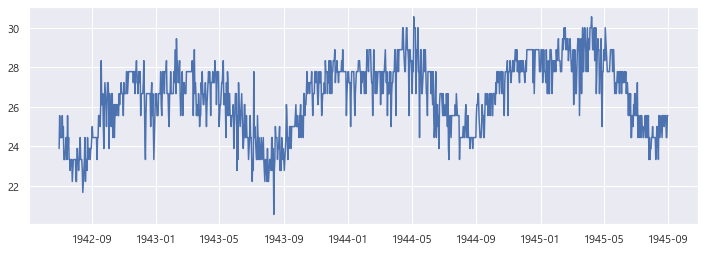

In [40]:
plt.figure(figsize=(12,4))
plt.plot(df)
plt.show()

## 시계열 분해

<pre> statsmodels.tsa.seasonal.<b>seasonal_decompose(x, model='additive', period=None, </b>
                                              filt=None, two_sided=True, extrapolate_trend=0)
model = {“additive”, “multiplicative”}
period = 분기(4) 월(12) 주(7)

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

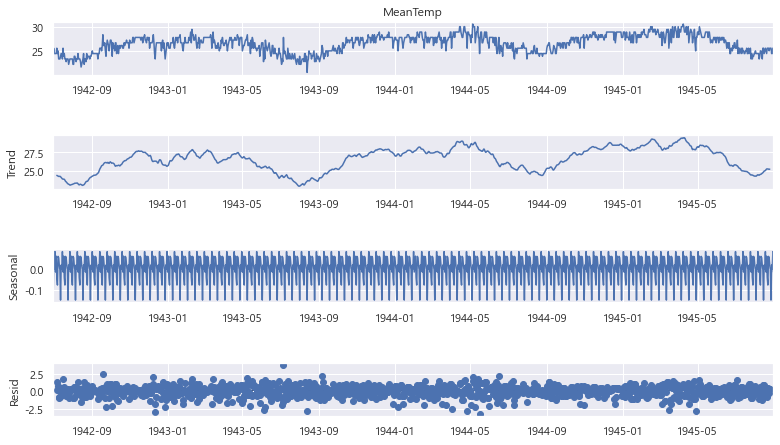

In [57]:
res = seasonal_decompose(df['MeanTemp'], model='additive', period=12)
fig = plt.figure()
fig = res.plot()
fig.set_size_inches(12,7) 
plt.show()

## ADF 정상성 검증
* <b>Augmented Dickey-Fuller test</b>
    * 검증 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )
    * <font color=red><b>귀무가설(H0): non-stationary.
    * <font color=red><b>대체가설 (H1): stationary.

<pre>
statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

return
adf
The test statistic.

<b>pvalue
MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).</b>

usedlag
The number of lags used.

nobs
The number of observations used for the ADF regression and calculation of the critical values.

critical values
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).

icbest
The maximized information criterion if autolag is not None.

resstore
A dummy class with results attached as attributes.

In [59]:
from statsmodels.tsa.stattools import adfuller

* 귀무가설 : 데이터는 비정상성을 보인다
* 대립가설 : 데이터는 정상성을 보인다.
    * p-value(0.05) < 0.1383

In [65]:
adf = adfuller(df)
pvalue = adf[1]
print(pvalue) # 0.05보다 크기때문에 귀무가설 채택(데이터는 비정상성 데이터이다)

0.13838534571230615


## 차분
* 데이터를 1차분한 결과 : 정상성을 보인다

In [66]:
df.head()

,MeanTemp
Date,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


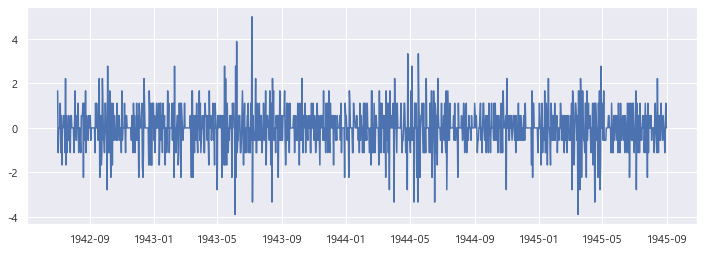

In [69]:
df_diff = df - df.shift(1)
plt.figure(figsize=(12,4))
plt.plot(df_diff)
plt.show()

In [76]:
df_diff = df_diff.fillna(0)
df_diff.isna().sum()

MeanTemp    0
dtype: int64

In [78]:
adf = adfuller(df_diff)
pvalue = adf[1]
print(pvalue) # 0.05보다 한없이 작은 값, 귀무가설 기각(데이터는 정상성 데이터이다)

1.8505388129294912e-26


## ACF PACF
* <font color=red><b>정상성의 데이터를 가지고 그래프를 그려 AR MA 모형 판단

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

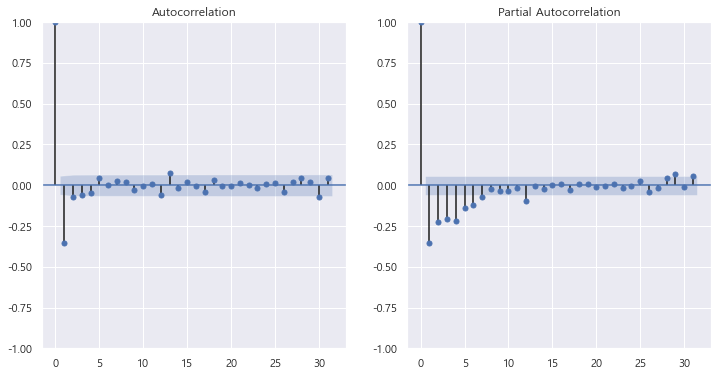

In [81]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
plot_acf(df_diff, ax=ax1)
ax2 = plt.subplot(1,2,2)
plot_pacf(df_diff, ax=ax2)
plt.show()

* ACF = MA(1)
* PACF = AR(0) : 지수적감소를 보인다(AR모형은 적합하지 않다)
* p=0 d=1 q=1
* ARIMA(0, 1, 1)

<pre>
class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, 
                                        <b>order=(0, 0, 0), 
                                        seasonal_order=(0, 0, 0, 0), </b>
                                        trend=None, 
                                        enforce_stationarity=True, enforce_invertibility=True,
                                        concentrate_scale=False, trend_offset=1, dates=None, 
                                        freq=None, missing='none', validate_specification=True)[

In [83]:
len(df)

1157

In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ----------- train test 분리 ---------------
# train_test_split(test_size=3)
train = df.iloc[:1136:, :]
val = df.iloc[1137:, :]  

# ----------- 학습  ---------------
model = ARIMA(df, order=(0, 1, 1))
fit_res = model.fit()

# ----------- OLS레포트 -----------
print(fit_res.summary())

# ----------- 예측  ---------------
# pred = fit_res.forecast(steps=20)
pred = fit_res.predict(1138, 1157, typ='levels')  # typ='linear' :차분결과

# ----------- 평가  ---------------
score = np.sqrt(mean_squared_error(val, pred))
print(pred)
print(val)
print(f"RMSE : {score:.4f}")

                               SARIMAX Results                                
Dep. Variable:               MeanTemp   No. Observations:                 1157
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1472.685
Date:                Tue, 04 Apr 2023   AIC                           2949.369
Time:                        15:59:48   BIC                           2959.475
Sample:                             0   HQIC                          2953.183
                               - 1157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7306      0.019    -38.705      0.000      -0.768      -0.694
sigma2         0.7478      0.023     32.883      0.000       0.703       0.792
Ljung-Box (L1) (Q):                  23.80   Jarque-

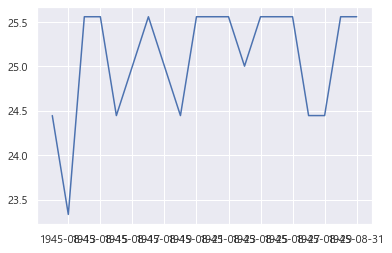

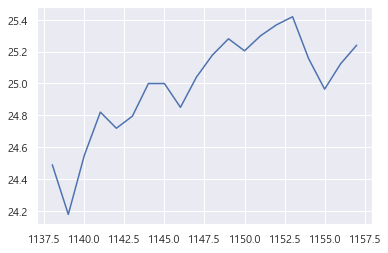

In [136]:
# plt.figure(figsize=(20,10))
plt.plot(val)
plt.show()
plt.plot(pred)
plt.show()

# 4. [실습] ARIMA를 활용한 비트코인 가격 예측

In [2]:
import pandas as pd

sr = pd.read_csv('market-price.csv', header=0, index_col='Timestamp', squeeze=True)
sr.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_20460\1652713393.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  sr = pd.read_csv('market-price.csv', header=0, index_col='Timestamp', squeeze=True)


FileNotFoundError: [Errno 2] No such file or directory: 'market-price.csv'